In [3]:
import numpy as np
import pandas as pd
import quantecon as qe
from ast import literal_eval
from sklearn.ensemble import RandomForestRegressor
import ternary
import random
import plotly.figure_factory as ff
import colorsys
from matplotlib import pyplot as plt

In [61]:
elements = 8
grid_len = 14

In [62]:
simplex_grid = qe.simplex_grid(elements, grid_len)/grid_len

#Translating Vector
translation = 1/(grid_len*elements)
translating_vector = [-(elements-1)*translation]
for i in range(elements-1):
    translating_vector.append(translation)
translating_vector = np.array(translating_vector)                  

#Making grid
grid_points_1 = simplex_grid + translating_vector
grid_points_2 = simplex_grid + 2*translating_vector
grid_points = np.vstack((grid_points_1, grid_points_2))
grid_points = np.around(grid_points, decimals = 4)
grid_points = grid_points[grid_points[:, 0].argsort()]

#Deleting grid points outside the space
grid_points = np.delete(grid_points, np.where(grid_points<0)[0], axis = 0)
grid_points = np.delete(grid_points, np.where(grid_points>1)[0], axis = 0)

In [40]:
grid_points = grid_points[[0, 1, 2, 4]]

In [63]:
np.sqrt(sum((simplex_grid[0]-simplex_grid[1])**2))

0.10101525445522104

In [60]:
len(simplex_grid)

116280

In [42]:
distance = []
for i in grid_points:
    distance.append(np.sqrt(sum((i-grid_points[3])**2)))
print(distance)

[0.7071067811865476, 0.7071067811865476, 0.7071067811865476, 0.0]


[0.4330127018922193, 0.4330127018922193, 0.4330127018922193, 0.0, 0.4330127018922193]


In [43]:
test_elements = 4
test_grid_len = 5

test_simplex_grid = qe.simplex_grid(test_elements, test_grid_len)/test_grid_len

#Translating Vector
test_translation = 1/(test_grid_len*test_elements)
test_translating_vector = [-(test_elements-1)*test_translation]
for i in range(test_elements-1):
    test_translating_vector.append(test_translation)
test_translating_vector = np.array(test_translating_vector)                  

#Making grid
test_grid_points_1 = test_simplex_grid + test_translating_vector
test_grid_points_2 = test_simplex_grid + 2*test_translating_vector
test_grid_points = np.vstack((test_grid_points_1, test_grid_points_2))
test_grid_points = np.around(test_grid_points, decimals = 4)
test_grid_points = test_grid_points[test_grid_points[:, 0].argsort()]

#Deleting grid points outside the space
test_grid_points = np.delete(test_grid_points, np.where(test_grid_points<0)[0], axis = 0)
test_grid_points = np.delete(test_grid_points, np.where(test_grid_points>1)[0], axis = 0)

In [ ]:
"""#Find the distance
for i in range(len(grid_points)):
    locals()['distance_' + str(i)] = []
    for x in test_grid_points:
        locals()['distance_' + str(i)].append(np.sqrt(sum((grid_points[i]-x)**2)))
    locals()['distance_' + str(i)] = np.array(locals()['distance_' + str(i)])

#Grouping
number_per_groups = int(len(test_grid_points)/len(grid_points))
for i in range(len(grid_points)):
    locals()['group_' + str(i)] = test_grid_points[locals()['distance_' + str(i)].argsort()[:number_per_groups]]"""

In [44]:
#Find where each point belongs to
belongs_to = []
for x in test_grid_points:
    distance_to_every_grid = []
    for i in grid_points:
        distance_to_every_grid.append(np.sqrt(sum((i-x)**2)))
    distance_to_every_grid = np.array(distance_to_every_grid)
    belongs_to.append(distance_to_every_grid.argmin())
belongs_to = np.array(belongs_to)

#Grouping
for i in range(len(grid_points)):
    locals()['group_' + str(i)] = test_grid_points[np.where(belongs_to == i)]

In [48]:
len(group_3)

11

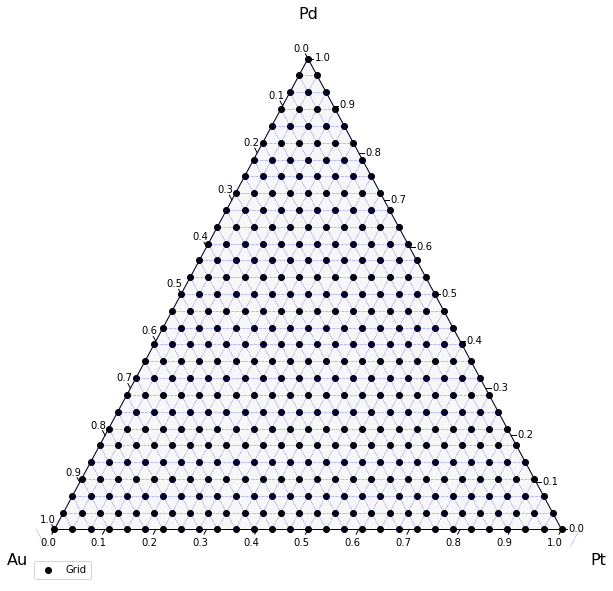

In [51]:
#Parameter for plotting
scale = 1
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)

#Plotting the starting points
tax.scatter(simplex_grid, marker='o', color='black', label='Grid')


tax.legend()


tax.right_corner_label("Pt", fontsize=16)
tax.top_corner_label("Pd", fontsize=16)
tax.left_corner_label("Au", fontsize=16)
tax.boundary(linewidth=1.0)
tax.gridlines(multiple=1/grid_len, color="blue")
tax.ticks(axis='lbr', linewidth=1, multiple=0.1, tick_formats="%.1f")
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')
tax.show() 

In [ ]:
test = grid_points[60]
distance_grid = []
for x in range(len(grid_points)):
    distance_grid.append(np.sqrt(sum((test-grid_points[x])**2)))
distance_grid = np.array(distance_grid)

In [ ]:
distance_grid.sort()
distance_grid

In [ ]:
grid_points[distance_grid.argmin()]

In [ ]:
region_63 = np.array([0.3667, 0.3667, 0.2667])
region_67 = np.array([0.4333, 0.3333, 0.2333])
region_72 = np.array([0.4667, 0.2667, 0.2667])
region_54 = np.array([0.3333, 0.4333, 0.2333])
pso_min_point = np.array([0.376, 0.326, 0.297])
min_point = np.array([0.4,  0.29, 0.31])


In [ ]:
np.sqrt(sum((min_point-region_63)**2))

In [ ]:
#Parameter for plotting
scale = 1
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)

#Plotting the starting points
tax.scatter(grid_points, marker='o', color='black', label='Grid')
tax.scatter([pso_min_point], marker='*', color='red', label='PSO Minimum')
tax.scatter([min_point], marker='s', color='red', label='Grid Minimum')
tax.scatter([region_63], marker='o', color='green', label='Region 63')
tax.scatter([region_67], marker='o', color='blue', label='Region 67')
tax.scatter([region_72], marker='o', color='magenta', label='Region 72')

tax.legend()


tax.right_corner_label("Pt", fontsize=16)
tax.top_corner_label("Pd", fontsize=16)
tax.left_corner_label("Au", fontsize=16)
tax.boundary(linewidth=1.0)
tax.gridlines(multiple=1/grid_len, color="blue")
tax.ticks(axis='lbr', linewidth=1, multiple=0.1, tick_formats="%.1f")
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')
tax.show() 

In [ ]:
elements = 8
grid_len = 5

In [ ]:
simplex_grid = qe.simplex_grid(elements, grid_len)/grid_len

#Translating Vector
translation = 1/(grid_len*elements)
translating_vector = [-(elements-1)*translation]
for i in range(elements-1):
    translating_vector.append(translation)
translating_vector = np.array(translating_vector)                  

#Making grid
grid_points_1 = simplex_grid + translating_vector
grid_points_2 = simplex_grid + 2*translating_vector
grid_points = np.vstack((grid_points_1, grid_points_2))
grid_points = np.around(grid_points, decimals = 4)
grid_points = grid_points[grid_points[:, 0].argsort()]

#Deleting grid points outside the space
grid_points = np.delete(grid_points, np.where(grid_points<0)[0], axis = 0)
grid_points = np.delete(grid_points, np.where(grid_points>1)[0], axis = 0)

In [ ]:
len(grid_points)

In [ ]:
grid_points[402]

In [ ]:
distance_grid = []
for x in range(len(grid_points)):
    distance_grid.append(np.sqrt(sum((grid_points[402]-grid_points[x])**2)))
distance_grid = np.array(distance_grid)

In [ ]:
distance_grid.sort()
distance_grid

In [ ]:
tuple(grid_points)[2]

In [ ]:
hotspot = np.array([[0.2667, 0.3667, 0.3667], [0.4333, 0.2333, 0.3333], [0.3667, 0.3667, 0.2667], 
                    [0.4667, 0.2667, 0.2667], [0.3667, 0.4667, 0.1667], [0.3333, 0.3333, 0.3333],
                    [0.2667, 0.4667, 0.2667], [0.3333, 0.5333, 0.1333], [0.4667, 0.3667, 0.1667]])

In [ ]:
import pylab as p
import ternary as t

figure, d=t.figure(scale=1)

d.boundary(linewidth=2.0)
d.gridlines(multiple=0.1,color="blue",linewidth=0.8)

d.set_title(r"source flavour composition $\nu_e,\nu_\mu,\nu_\tau$",fontsize=20)
d.left_axis_label(r"$\nu_\tau$",fontsize=20,offset=0.12)
d.right_axis_label(r"$\nu_\mu$",fontsize=20)
d.bottom_axis_label(r"$\nu_e$",fontsize=20)
d._redraw_labels()

d.ticks(axis='brl',multiple=0.1, tick_formats="%.1f")
p.axis('off')
point1=[(0.34669820676138435,0.3336302826666826,0.31967151057193305)]
d.scatter(point1, marker='D', color='green', label=r"$(\frac{1}{3},\frac{2}{3},0)$")
d.resize_drawing_canvas(scale=1.05)
d.legend()
d.show()

In [ ]:
def find_correction(a):
    while a.max() > 1 or a.min() < 0:
        correction = []
        for i in range(3):
            if a[i] > 1:
                for x in range(i):
                    correction.append(-2*(1 - a[i])/(3-1))
                correction.append(2*(1 - a[i]))
                for x in range(3-1-i):
                    correction.append(-2*(1 - a[i])/(3-1))

            if a[i] < 0:
                for x in range(i):
                    correction.append(-2*(0 - a[i])/(3-1))
                correction.append(2*(0 - a[i]))
                for x in range(3-1-i):
                    correction.append(-2*(0 - a[i])/(3-1))

        correction = np.array(correction)
        correction = np.reshape(correction, (int(len(correction)/3), 3))
        for i in range(len(correction)):
             a = a + correction[i]
    return a

In [ ]:
def correct_velocity(final_position, velocity):
    bounced_velocity_0 = np.where(final_position < 0, velocity * -1, velocity)
    bounced_velocity_1 = np.where(final_position > 1, bounced_velocity_0 * -1, bounced_velocity_0)
    normalized_velocity = bounced_velocity_1 - (sum(bounced_velocity_1)/3)
    unit_velocity = normalized_velocity/np.sqrt(sum(normalized_velocity**2))
    corrected_velocity = unit_velocity * np.sqrt(sum(bounced_velocity_1**2))
    corrected_velocity = np.around(corrected_velocity, decimals = 3)
    return corrected_velocity

In [ ]:
initial_position = np.array([0.1, 0.85, 0.05])
velocity = np.array([-0.35, 0.4, 0.05])
final_position = initial_position + velocity

In [ ]:
print(final_position)
print(find_correction(final_position))
print(correct_velocity(final_position, velocity))

In [ ]:
a_1 = np.where(final_position < 0, velocity * -1, velocity)
a = np.where(final_position > 1, a_1 * -1, a_1)

In [ ]:
a_1

In [ ]:
a

In [ ]:
np.sqrt(sum(np.array([-0.3, 0.4, -0.1])**2))

In [ ]:
b - (sum(b)/3)

In [ ]:
c = np.array([-3.3, 2.4, 0.9])
d = np.abs(c)
e = d - (sum(d)/3)
f = e/np.sqrt(sum(e**2))
g = f * np.sqrt(sum(d**2)) * 0.2